<a href="https://colab.research.google.com/github/toche7/DSEssentials/blob/main/DemoHearAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/diegoamd/heart-attack-prediction-xgboost-98-accuracy


In [ ]:
import pandas as pd
data = pd.read_csv("https://github.com/toche7/DataSets/raw/main/Medicaldataset.csv")
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


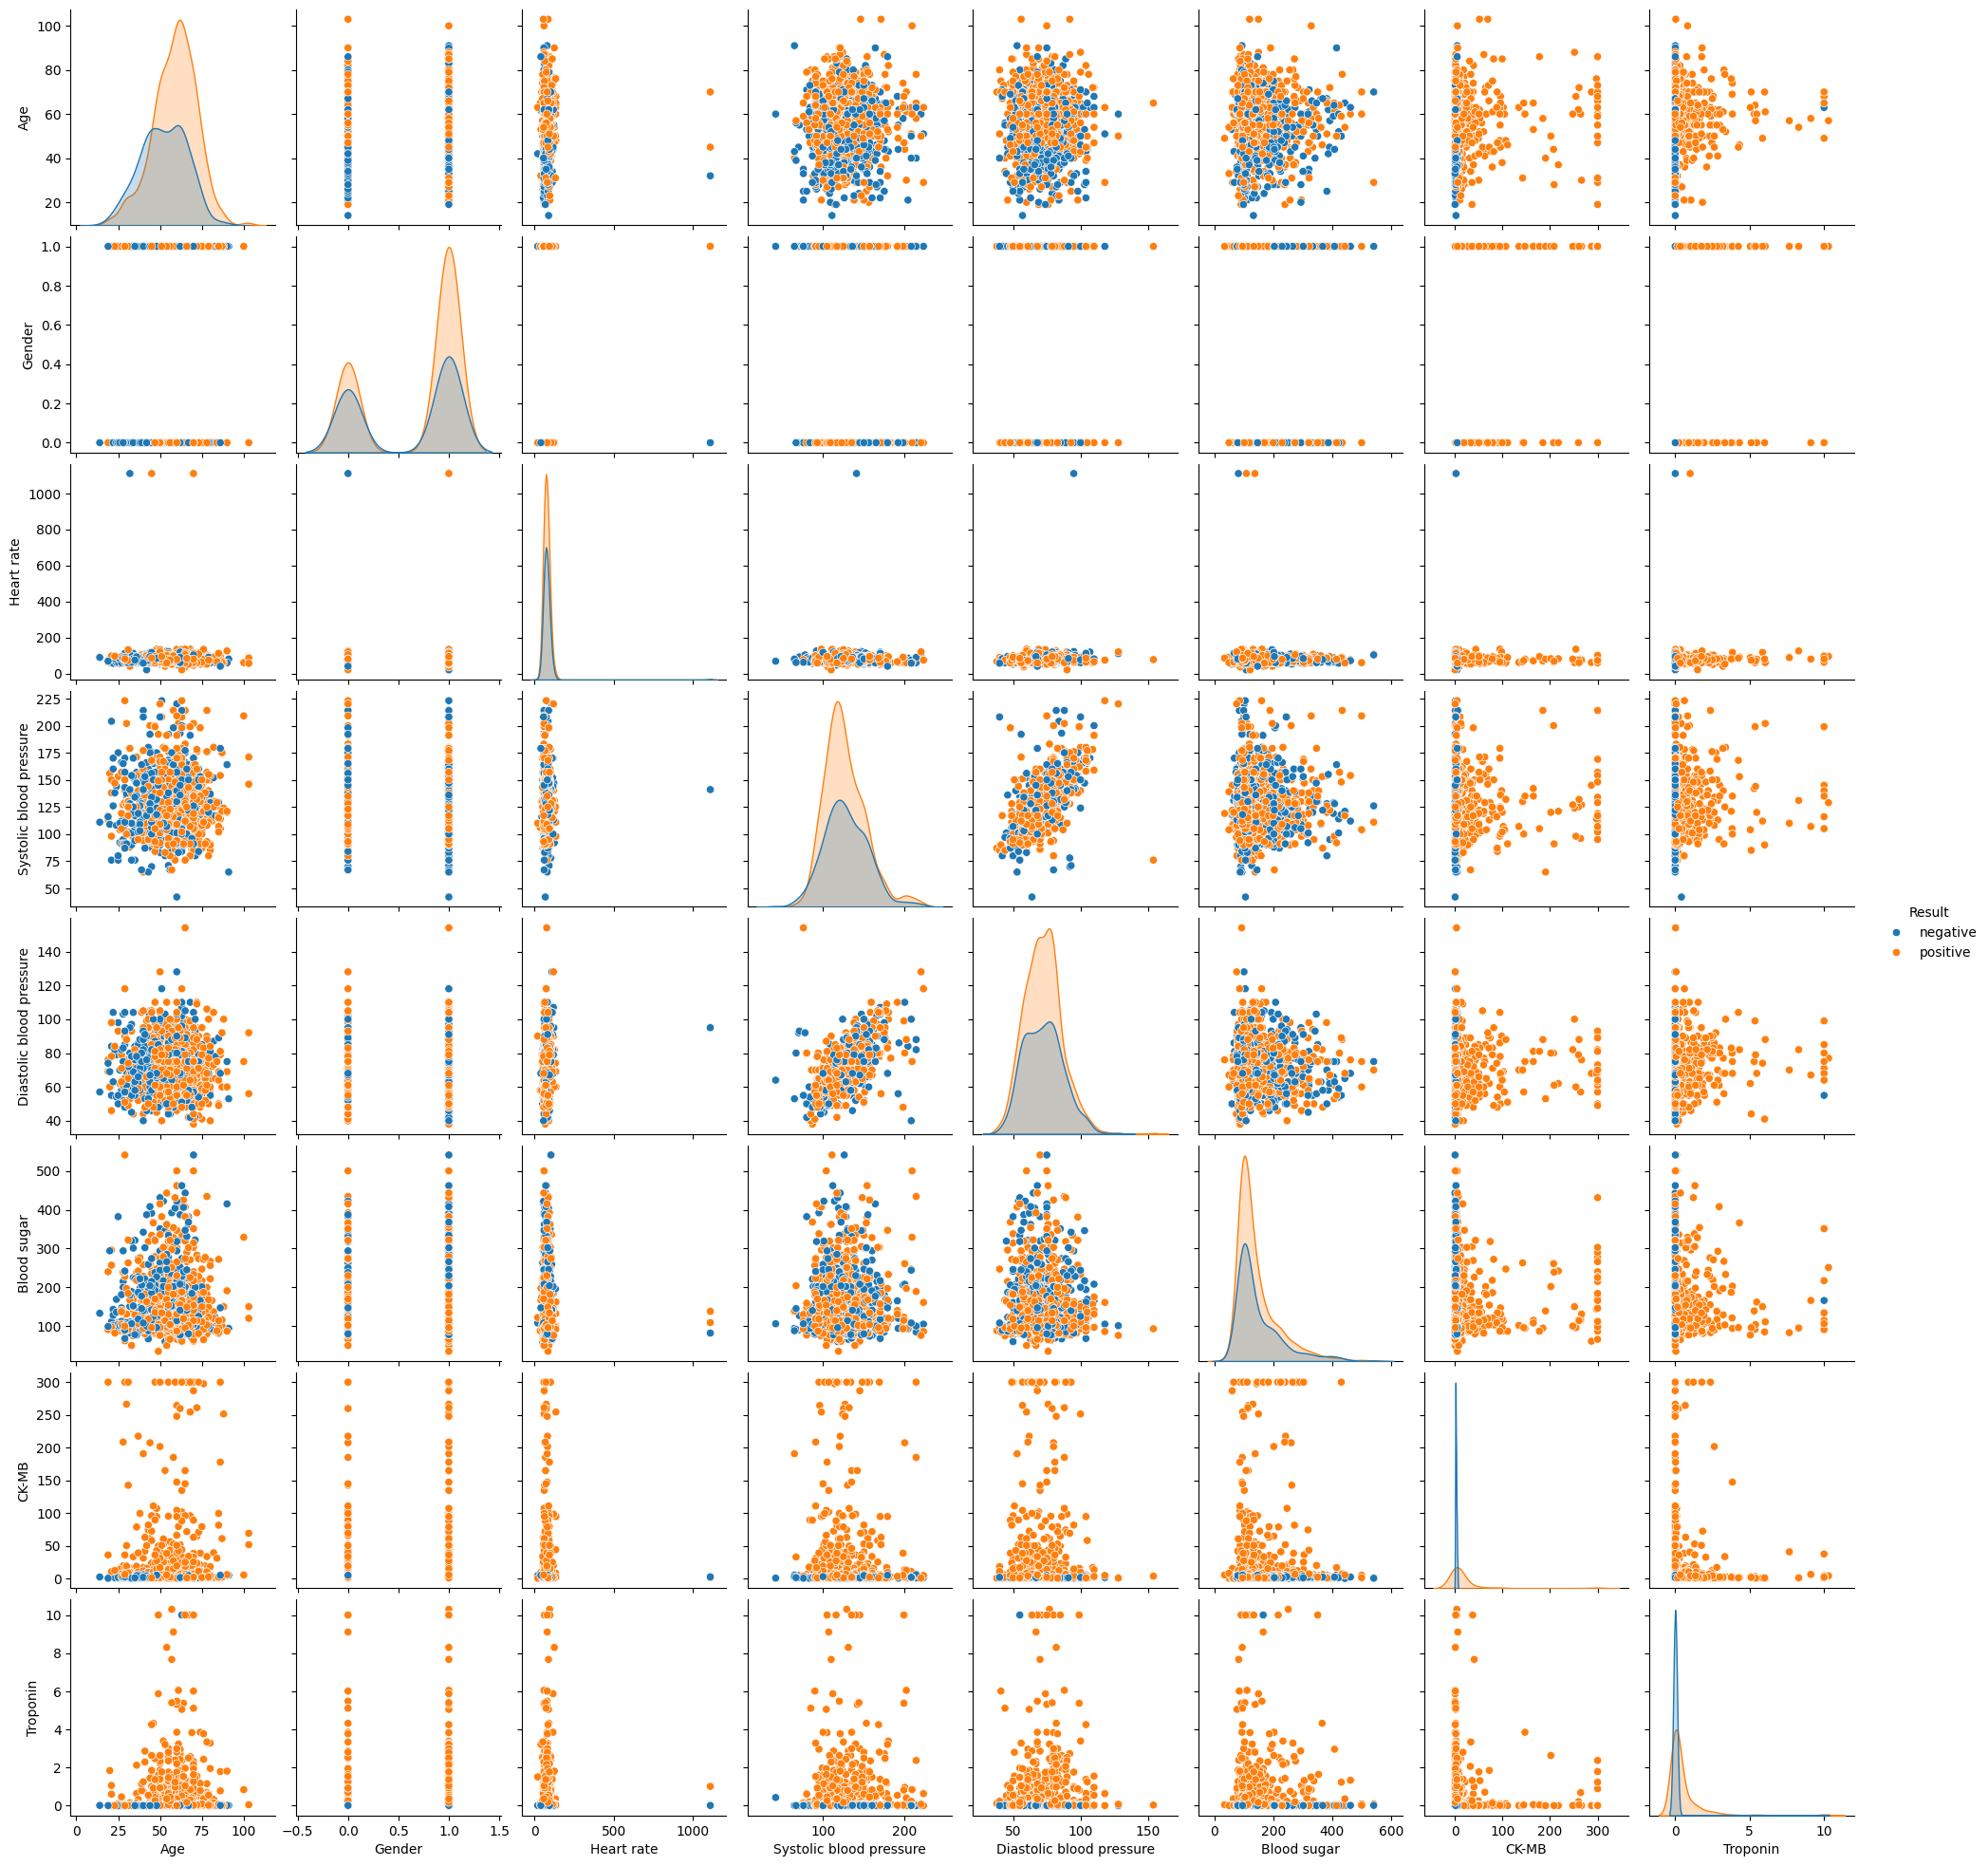

In [ ]:
# prompt: pair plot data use result as hue

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='Result')
plt.show()

In [ ]:
# prompt: create logistic regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'Result' is the target variable
X = data.drop('Result', axis=1)
y = data['Result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
class_report

Accuracy: 0.7727272727272727
Confusion Matrix:
[[101  54]
 [ 36 205]]
Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'              precision    recall  f1-score   support\n\n    negative       0.74      0.65      0.69       155\n    positive       0.79      0.85      0.82       241\n\n    accuracy                           0.77       396\n   macro avg       0.76      0.75      0.76       396\nweighted avg       0.77      0.77      0.77       396\n'

In [ ]:
# prompt: create neural network model use sklearn

from sklearn.neural_network import MLPClassifier

# Create a Multi-layer Perceptron (MLP) classifier
# You might need to tune the parameters like hidden_layer_sizes, activation, solver, etc.
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)

print(f"MLP Accuracy: {accuracy_mlp}")
print("MLP Confusion Matrix:")
print(conf_matrix_mlp)
print("MLP Classification Report:")
class_report_mlp


MLP Accuracy: 0.7070707070707071
MLP Confusion Matrix:
[[ 81  74]
 [ 42 199]]
MLP Classification Report:


'              precision    recall  f1-score   support\n\n    negative       0.66      0.52      0.58       155\n    positive       0.73      0.83      0.77       241\n\n    accuracy                           0.71       396\n   macro avg       0.69      0.67      0.68       396\nweighted avg       0.70      0.71      0.70       396\n'

## SHAP

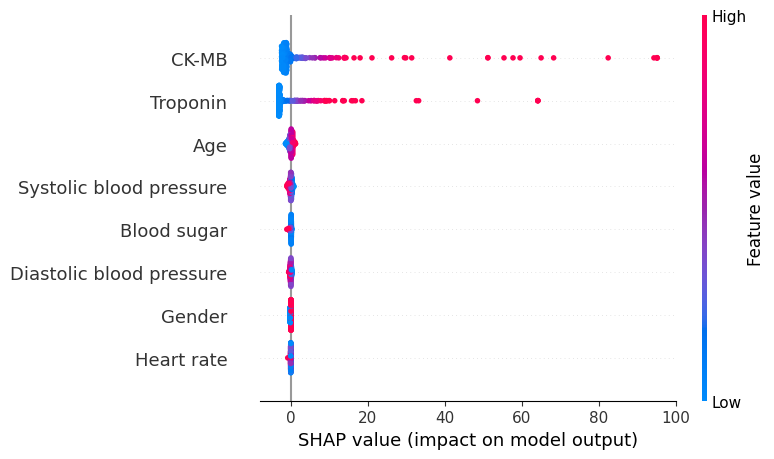

In [ ]:
# prompt: use SHAP to explain Logistic Model

!pip install shap
import shap

# Create a SHAP explainer for the logistic regression model
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the explanation for a single prediction (e.g., the first instance in the test set)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# Visualize the summary of feature importance
shap.summary_plot(shap_values, X_test)

# Visualize the summary plot by class (for multi-class classification)
# If you have a binary classification, this will show for one class
# shap.summary_plot(shap_values, X_test, plot_type="bar") # For bar plot


## ROC

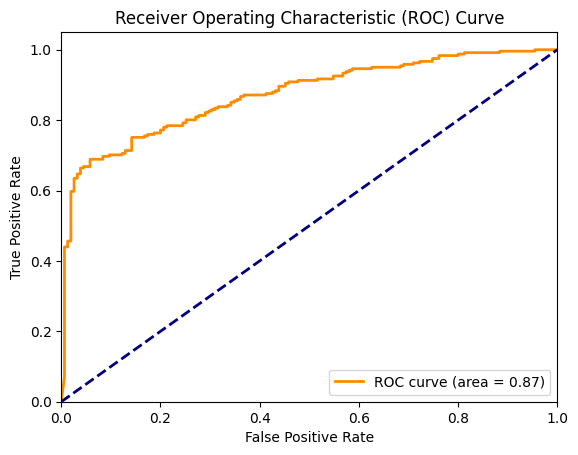

In [ ]:
# prompt: plot ROC of Logistic

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Get the predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Convert y_test labels to numeric (0 for 'negative', 1 for 'positive')
y_test_numeric = y_test.apply(lambda x: 1 if x == 'positive' else 0)


# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()